# Data Science Blog Post Project

![title](ds1.png)

This notebook contains the code and analysis for two datasets using CRISP-DM metodology.


This is the link to the Blog Post:
https://vasildatascience.wordpress.com/2019/03/04/crisp-dm/


CRISP-DM Process (Cross Industry Process for Data Mining)


1. Business Understanding

2. Data Understanding

3. Prepare Data

4. Data Modeling

5. Evaluate the Results

6. Deploy



<br>
For CRISP-DM reference:

https://www.sv-europe.com/crisp-dm-methodology/

https://en.wikipedia.org/wiki/Cross-industry_standard_process_for_data_mining


### Business Understanding

What problem we are trying to solve and what questtions we will answer. Here is what we will try to achive.

Get hands on practice with few datasets from www.kaggle.com. By looking at the columns we can get tons of questions. I will go over 3 question and find the answers using CRISP-DM Process. The same process should be able to answer more questions and differnt datasets. 

**<font color='red'>Question1: </font>Where is more expensive - Boston or Seattle go on vacation**

**<font color='red'>Question2: </font>What are the busiest days and what time is best to go - more rental options**

**<font color='red'>Question3: </font>Create model for rental price prediction**

### 2. Data Understanding

After Business Understanding we need to move to the data. We might need to collect or already have it collected. The data is already presented in our case and we will just use it for our analysis.

Datasets used:

**Boston, MA, USA Airbnb Open Data** - listing activity of homestays in Boston, MA. You can find the datasets used from the following link:  https://www.kaggle.com/airbnb/boston

**Seattle, WA, USA  Airbnb Open Data** - listing activity of homestays in Seattle, WA. You can find the datasets used from the following link: https://www.kaggle.com/airbnb/seattle/


 Information about the datasets:
 - Calendar (calendar.csv) -  includes listing id and the price and availability for that day
 - Listings (listings.csv) - includes full descriptions and average review score
 - Reviews (reviews.csv) - includes unique id for each reviewer and detailed comments 


#### First we will import the necessary libraries. Always put this on the top of your code/file. 

For more information:
https://docs.python.org/3/faq/programming.html#what-are-the-best-practices-for-using-import-in-a-module 

In [1]:
#Import the necessary libraries.
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

import matplotlib.pyplot as plt
%matplotlib inline


#### Let's read in the data first


In [2]:
#Loading Boston Datasets
df_b_cal = pd.read_csv('./boston/calendar.csv')
df_b_list = pd.read_csv('./boston/listings.csv')
df_b_rev = pd.read_csv('./boston/reviews.csv')

In [3]:
#Loading Seattle Datasets
df_s_cal = pd.read_csv('./seattle/calendar.csv')
df_s_list = pd.read_csv('./seattle/listings.csv')
df_s_rev = pd.read_csv('./seattle/reviews.csv')

----------
#### I am using mainly calendar.csv and listings.csv datasets as I think they will provide the answers to my questions. reviews.csv can be used for listing review prediction for example (not covered here)
----------

Lets use Pandas head() function to virify first 5 rows for the object based on position. It will help for quickly testing and if we have the right type of data.

https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.head.html

In [4]:
#Boston data verification  - calendar.csv
df_b_cal.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [5]:
df_b_cal.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object

In [6]:
#Seattle data verification  - calendar.csv
df_s_cal.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [7]:
df_s_cal.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object

In [8]:
#Function for converting 'date' to datetime64 type and 'price' to float64, then creating visualization  for how prices
#are going based on day/month of the year

def clean_astype_date(df, price_per_day, price_per_month):
    '''
    INPUT 
        df - dataset need to be changed 
        price_per_day - the name of the new dataset including price per day
        price_per_month - the name of new dataset including price per month
        
    OUTPUT
        df - changed dataset 
        price_per_day - the new dataset including price per day
        price_per_month - the new dataset including price per month
    '''
    df["date"] = df["date"].astype("datetime64")
    df= df[df.columns[1:]].replace('[\$,]', '', regex=True)
    df['price'] = df['price'].astype('float64')
    
    df['day'] = df['date'].map(lambda x: x.timetuple().tm_yday)
    df['month'] = df['date'].map(lambda x: x.timetuple().tm_mon)
    

    # Average price per day of the year
    price_per_day = df.drop(['month'],axis=1).groupby('day').mean()
    # Average price per month of the year
    price_per_month = df.drop(['day'],axis=1).groupby('month').mean()
    
    return df, price_per_day, price_per_month

    

In [9]:
#Boston
price_per_day_b = pd.DataFrame()
price_per_month_b = pd.DataFrame()
df_b_cal, price_per_day_b, price_per_month_b  = clean_astype_date(df_b_cal, price_per_day_b, price_per_month_b)

In [10]:
#Seattle
price_per_day_s = pd.DataFrame()
price_per_month_s = pd.DataFrame()
df_s_cal, price_per_day_s, price_per_month_s  = clean_astype_date(df_s_cal, price_per_day_s, price_per_month_s)

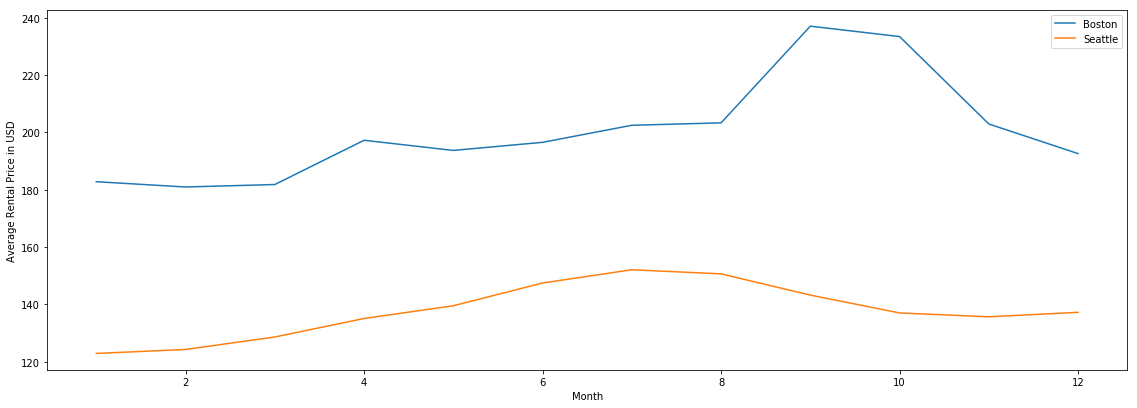

In [11]:
#Visualisation for how prices are changing based on month of the year

fig = plt.figure(figsize=(15,5))
ax = fig.add_axes([0,0,1,1])
ax.plot(price_per_month_b['price'], label='Boston')
ax.plot(price_per_month_s['price'], label='Seattle')
ax.legend()
ax.set_xlabel('Month')
ax.set_ylabel('Average Rental Price in USD');

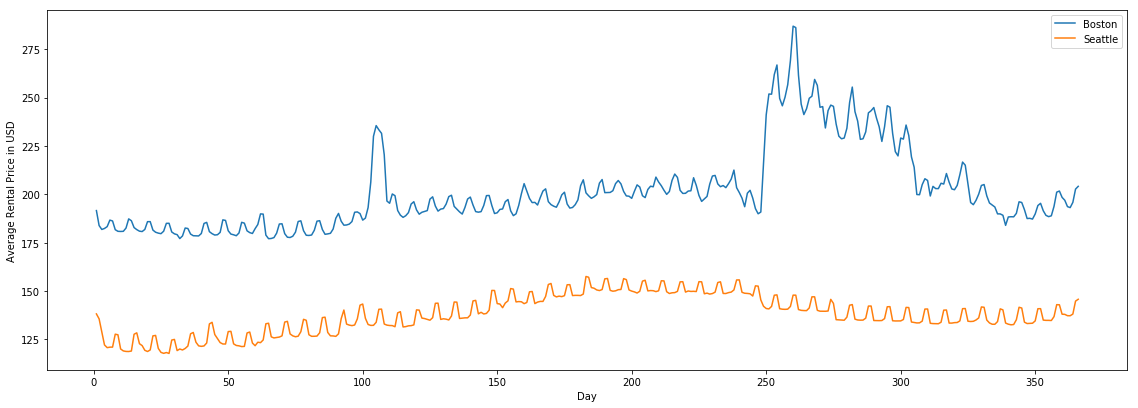

In [12]:
#Visualisation for how prices are changing based on day of the year

fig = plt.figure(figsize=(15,5))
ax = fig.add_axes([0,0,1,1])
ax.plot(price_per_day_b['price'], label='Boston')
ax.plot(price_per_day_s['price'], label='Seattle')
ax.legend()
ax.set_xlabel('Day')
ax.set_ylabel('Average Rental Price in USD');

In [13]:
# Google: The "mean" is the "average" you're used to, where you add up all the numbers and then divide by the number of numbers. The "median" is the "middle" value in the list of numbers

print('In Boston mean price is ${}'.format(int(df_b_cal['price'].mean())))
print('In Boston median price is ${}'.format(int(df_b_cal['price'].median())))

In Boston mean price is $198
In Boston median price is $150


In [14]:
# Google: The "mean" is the "average" you're used to, where you add up all the numbers and then divide by the number of numbers. The "median" is the "middle" value in the list of numbers

print('In Boston mean price is ${}'.format(int(df_s_cal['price'].mean())))
print('In Boston median price is ${}'.format(int(df_s_cal['price'].median())))

In Boston mean price is $137
In Boston median price is $109


----------
#### From the analysis so far we clearly see that Boston is more expensive destination.
----------
####  Next lets check tha availability per city

In [15]:
#Boston - availability per month
available_per_month_b = df_b_cal.drop(['day','price','date'],axis=1)
available_per_month_b = pd.get_dummies(available_per_month_b, columns = ['available'])
available_per_month_b = available_per_month_b.drop(['available_f'],axis=1).groupby('month').mean()

#Seattle - availability per month
available_per_month_s = df_s_cal.drop(['day','price','date'],axis=1)
available_per_month_s = pd.get_dummies(available_per_month_s, columns = ['available'])
available_per_month_s = available_per_month_s.drop(['available_f'],axis=1).groupby('month').mean()

In [16]:
#Seattle - availability per day
available_per_day_b = df_b_cal.drop(['month','price','date'],axis=1)
available_per_day_b = pd.get_dummies(available_per_day_b, columns = ['available'])
available_per_day_b = available_per_day_b.drop(['available_f'],axis=1).groupby('day').mean()

#Seattle - availability per day
available_per_day_s = df_s_cal.drop(['month','price','date'],axis=1)
available_per_day_s = pd.get_dummies(available_per_day_s, columns = ['available'])
available_per_day_s = available_per_day_s.drop(['available_f'],axis=1).groupby('day').mean()

# the above should be a function due to the repetitive code

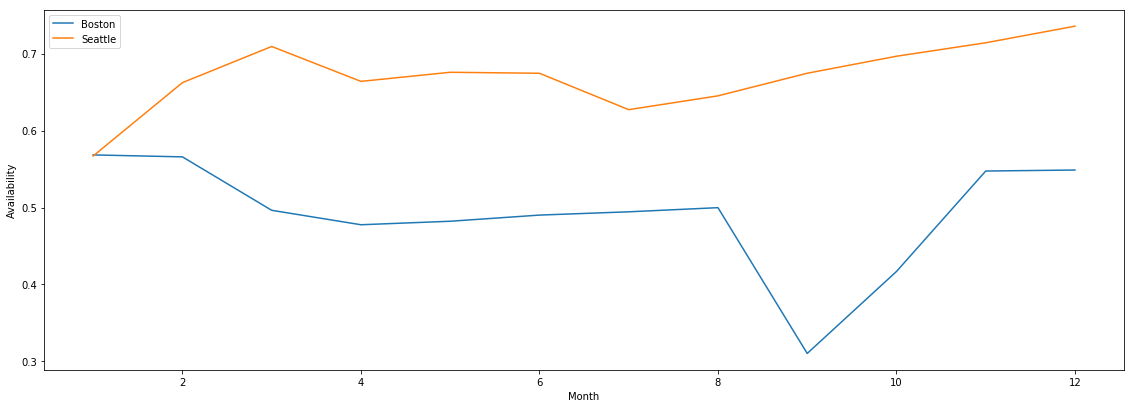

In [17]:
#Visualisation for how availability is changing based on month of the year

fig = plt.figure(figsize=(15,5))
ax = fig.add_axes([0,0,1,1])
ax.plot(available_per_month_b['available_t'], label='Boston')
ax.plot(available_per_month_s['available_t'], label='Seattle')
ax.legend()
ax.set_xlabel('Month')
ax.set_ylabel('Availability');

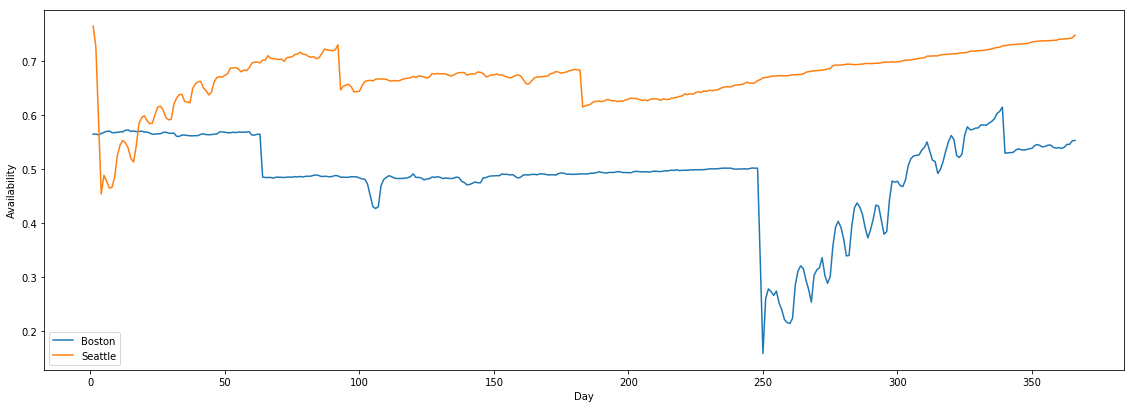

In [18]:
#Visualisation for how availability is changing based on day of the year

fig = plt.figure(figsize=(15,5))
ax = fig.add_axes([0,0,1,1])
ax.plot(available_per_day_b['available_t'], label='Boston')
ax.plot(available_per_day_s['available_t'], label='Seattle')
ax.legend()
ax.set_xlabel('Day')
ax.set_ylabel('Availability');

In [19]:
df_b_cal['available'].value_counts()/df_s_cal.shape[0]

f    0.477804
t    0.461431
Name: available, dtype: float64

In [20]:
df_s_cal['available'].value_counts()/df_s_cal.shape[0]

t    0.67061
f    0.32939
Name: available, dtype: float64

#### Another type of visualistaion which shows overal availability per city

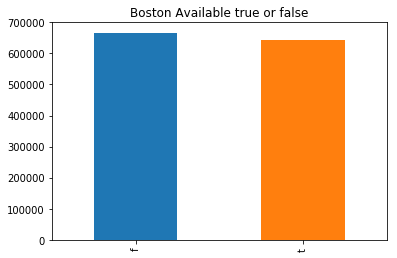

In [21]:
price101_x = df_b_cal.available.value_counts()
price101_x.plot(kind="bar");
plt.title("Boston Available true or false");

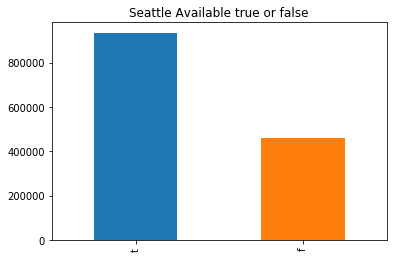

In [22]:
price101_x = df_s_cal.available.value_counts()
price101_x.plot(kind="bar");
plt.title("Seattle Available true or false");

In [23]:
#Boston - Which columns are without missing values? 
no_nulls_b = set(df_b_cal.columns[df_b_cal.isnull().mean() == 0])#Provide a set of columns with 0 missing values.
no_nulls_b 

{'available', 'date', 'day', 'month'}

In [24]:
df_b_cal['price'].isnull().mean() # missing values for 'price' column

0.5087157820748879

In [25]:
#Seattle - Which columns are without missing values? 
no_nulls_s = set(df_s_cal.columns[df_s_cal.isnull().mean() == 0])#Provide a set of columns with 0 missing values.
no_nulls_s 

{'available', 'date', 'day', 'month'}

In [26]:
df_s_cal['price'].isnull().mean() # missing values for 'price' column

0.32938998399793334

#### Which columns are with the most missing values? 

In [27]:
#Boston
most_miss_b = df_b_rev.isnull().mean().sort_values(ascending = False)

most_miss_b

comments         0.000776
reviewer_name    0.000000
reviewer_id      0.000000
date             0.000000
id               0.000000
listing_id       0.000000
dtype: float64

In [28]:
#Seattle
most_miss_s = df_s_rev.isnull().mean().sort_values(ascending = False)

most_miss_s

comments         0.000212
reviewer_name    0.000000
reviewer_id      0.000000
date             0.000000
id               0.000000
listing_id       0.000000
dtype: float64

**What proportion of the all listings in the dataset reported a Price**

In [29]:
prop_b_price = df_b_cal.notnull()['price'].mean() #Boston
#prop_b_price = 1 - df_b_cal.isnull()['price'].mean() #Boston
prop_b_price

0.4912842179251121

In [30]:
#prop_s_price = df_s_cal.notnull()['price'].mean() #Seattle
prop_s_price = 1 - df_s_cal.isnull()['price'].mean()
prop_s_price

0.6706100160020667

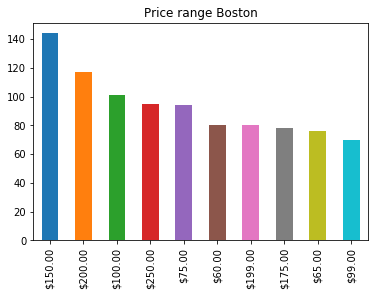

In [31]:


price10_b = df_b_list.price.value_counts().head(10)
price10_b.plot(kind="bar");
plt.title("Price range Boston");
plt.rcParams["figure.figsize"] = (15,5);

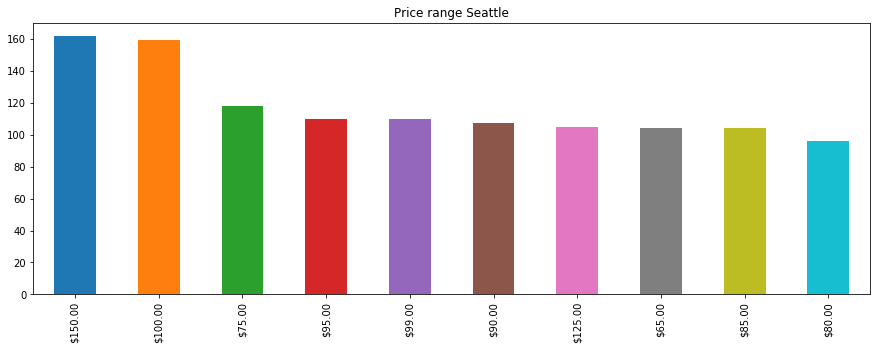

In [32]:
price10_s = df_s_list.price.value_counts().head(10)
#price10_s = df_s_cal.price.value_counts().head(10)
price10_s.plot(kind="bar");
plt.title("Price range Seattle");
plt.rcParams["figure.figsize"] = (15,5);

**From the analysis so far we clearly see that Boston is less available destination.
There are no significant peaks in Seattle. It can be hard to find rental during Boston marathon weekend and especially September when students are back to school. The missing values might affect our analysis especially if they  are related to a specific group or price range but I do not think this is the case in the datasets we I am using.**

----------
####  Next let’s check next dataset - listings.csv

In [33]:
#Boston data verification - listings.csv
df_b_list.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [34]:
#Boston find all columns which include 'price' - listings.csv
print(df_b_list.filter(like='price').columns)

Index(['price', 'weekly_price', 'monthly_price'], dtype='object')


In [35]:
#Seattle data verification - listings.csv
df_s_list.head().head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [36]:
#Seattle find all columns which include 'price' - listings.csv
print(df_s_list.filter(like='price').columns)

Index(['price', 'weekly_price', 'monthly_price'], dtype='object')


In [37]:
#Boston data verification - reviews.csv
df_b_rev.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [38]:
#Seattle data verification - reviews.csv
df_s_rev.head().head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


#### Let's find the number of rows and columns in each dataset

In [39]:
datasets = [df_b_cal, df_b_list, df_b_rev, df_s_cal, df_s_list, df_s_rev]

for i in datasets:
    print("Dataset:", [x for x in globals() if globals()[x] is i][0]) #Name of the dataset
    print("Number of rows in the dataset:",i.shape[0]) #Number of rows in the dataset
    print("Number of columns in the dataset:",i.shape[1]) #Number of columns in the dataset
    print('\n')


Dataset: df_b_cal
Number of rows in the dataset: 1308890
Number of columns in the dataset: 5


Dataset: df_b_list
Number of rows in the dataset: 3585
Number of columns in the dataset: 95


Dataset: df_b_rev
Number of rows in the dataset: 68275
Number of columns in the dataset: 6


Dataset: df_s_cal
Number of rows in the dataset: 1393570
Number of columns in the dataset: 5


Dataset: df_s_list
Number of rows in the dataset: 3818
Number of columns in the dataset: 92


Dataset: df_s_rev
Number of rows in the dataset: 84849
Number of columns in the dataset: 6




#### From the output above we see that in the Listings datasets for Boston and Seattle there are  differences in the columns. Let's find out what are the differences.

In [40]:
#Obtain all the column names in Boston Listings dataset
list_b_columns = list(df_b_list.columns.values)
len(list_b_columns)

95

In [41]:
#Obtain all the column names in Seattle Listings dataset
list_s_columns = list(df_s_list.columns.values)
len(list_s_columns)

92

In [42]:
#Find the delta  in the columns

col_diff = [i for i in list_b_columns if i not in list_s_columns]
 
print("Here are the columns missing from Seattle listings dataset: \n", col_diff) 

Here are the columns missing from Seattle listings dataset: 
 ['access', 'interaction', 'house_rules']


In [43]:
#Lets Find all categorical and numerical values for Boston and Seattle

def cat_and_num_val(datasets):
    for col in datasets:
        print("Dataset:", [x for x in globals() if globals()[x] is col][0]) #Name of the dataset)
        print("Numerical columns: ", col.select_dtypes(include=['int', 'float']).columns)
        print("Categorical columns ", col.select_dtypes(include=['category', object]).columns)
        print('\n')

cat_and_num_val(datasets)

Dataset: df_b_cal
Numerical columns:  Index(['price', 'day', 'month'], dtype='object')
Categorical columns  Index(['available'], dtype='object')


Dataset: df_b_list
Numerical columns:  Index(['id', 'scrape_id', 'host_id', 'host_listings_count',
       'host_total_listings_count', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'square_feet', 'guests_included', 'minimum_nights', 'maximum_nights',
       'has_availability', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'jurisdiction_names',
       'calculated_host_listings_count', 'reviews_per_month'],
      dtype='object')
Categorical columns  Index(['listing_url', 'last_scraped', 'name',

**We have already the data collected for us. We still need to wrangle the data in sach a way that we can get the answers of the questions we are looking for.**

**The wrangling and cleaning process takes majority of time and can be 80% of the all analysis process.** 


#### Will convert 'price', 'weekly_price', 'monthly_price' to numerical and will try to predict Price


In [44]:
#Will convert 'price', 'weekly_price', 'monthly_price' to numerical and will try to predict Price

#Boston remove $ sign
df_b_list_new = df_b_list[df_b_list.columns[1:]].replace('[\$,]', '', regex=True)
#Seattle  remove $ sign
df_s_list_new = df_s_list[df_s_list.columns[1:]].replace('[\$,]', '', regex=True)

# convert to float
df_b_list_new['price'] = df_b_list_new['price'].astype('float64')
df_s_list_new['price'] = df_s_list_new['price'].astype('float64')
df_b_list_new['weekly_price'] = df_b_list_new['weekly_price'].astype('float64')
df_s_list_new['weekly_price'] = df_s_list_new['weekly_price'].astype('float64')
df_b_list_new['monthly_price'] = df_b_list_new['monthly_price'].astype('float64')
df_s_list_new['monthly_price'] = df_s_list_new['monthly_price'].astype('float64')

list_new_df = [df_b_list_new, df_s_list_new]

cat_and_num_val(list_new_df)

Dataset: df_b_list_new
Numerical columns:  Index(['scrape_id', 'host_id', 'host_listings_count',
       'host_total_listings_count', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'square_feet', 'price', 'weekly_price', 'monthly_price',
       'guests_included', 'minimum_nights', 'maximum_nights',
       'has_availability', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'jurisdiction_names',
       'calculated_host_listings_count', 'reviews_per_month'],
      dtype='object')
Categorical columns  Index(['listing_url', 'last_scraped', 'name', 'summary', 'space',
       'description', 'experiences_offered', 'neighborhood_overview', 'notes',


<Figure size 1440x1440 with 0 Axes>

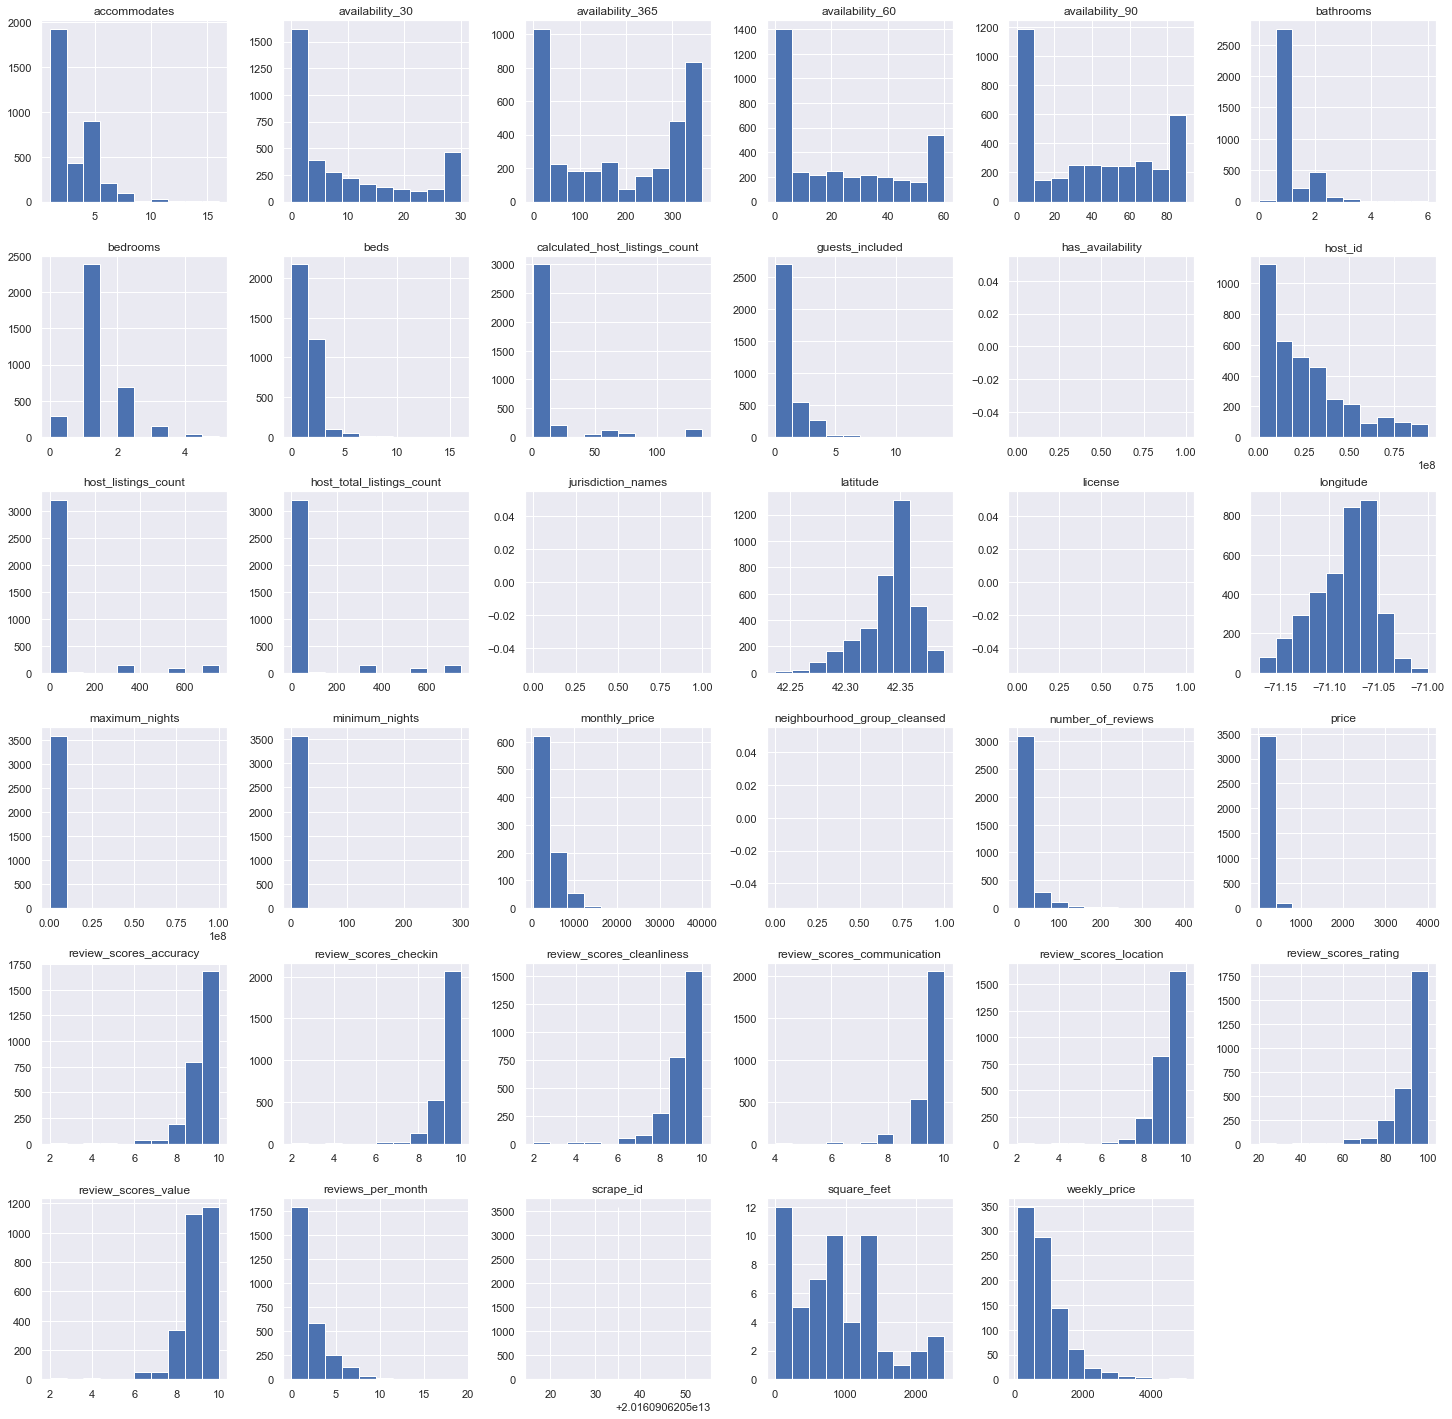

In [48]:
# we can answer more questions also from a quick look below for both cities
# like where properties are bigger based (more bathrooms/bedrooms for example)
# also avaalability - Boston looks like less available for renting

fig = plt.figure(figsize = (20,20))
df_b_list_new.hist();

<Figure size 1440x1440 with 0 Axes>

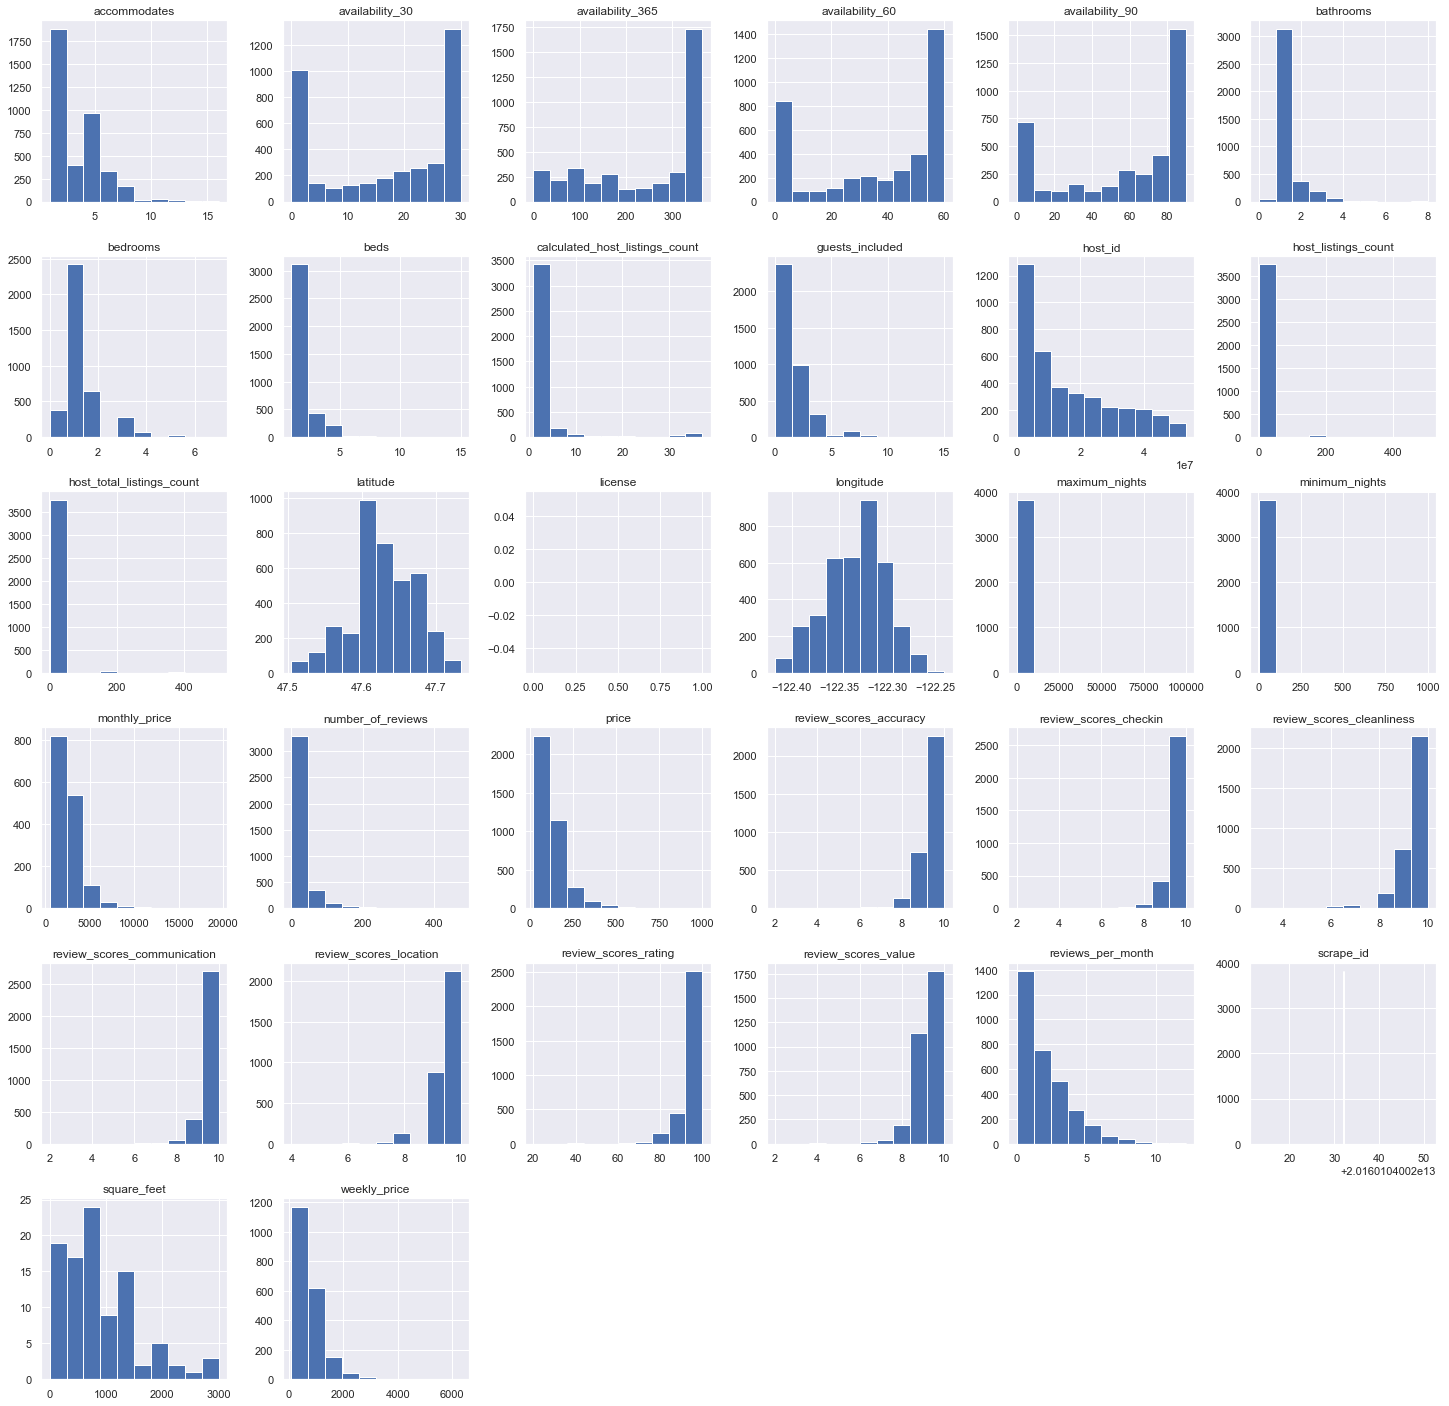

In [49]:
fig = plt.figure(figsize = (20,20))
df_s_list_new.hist();

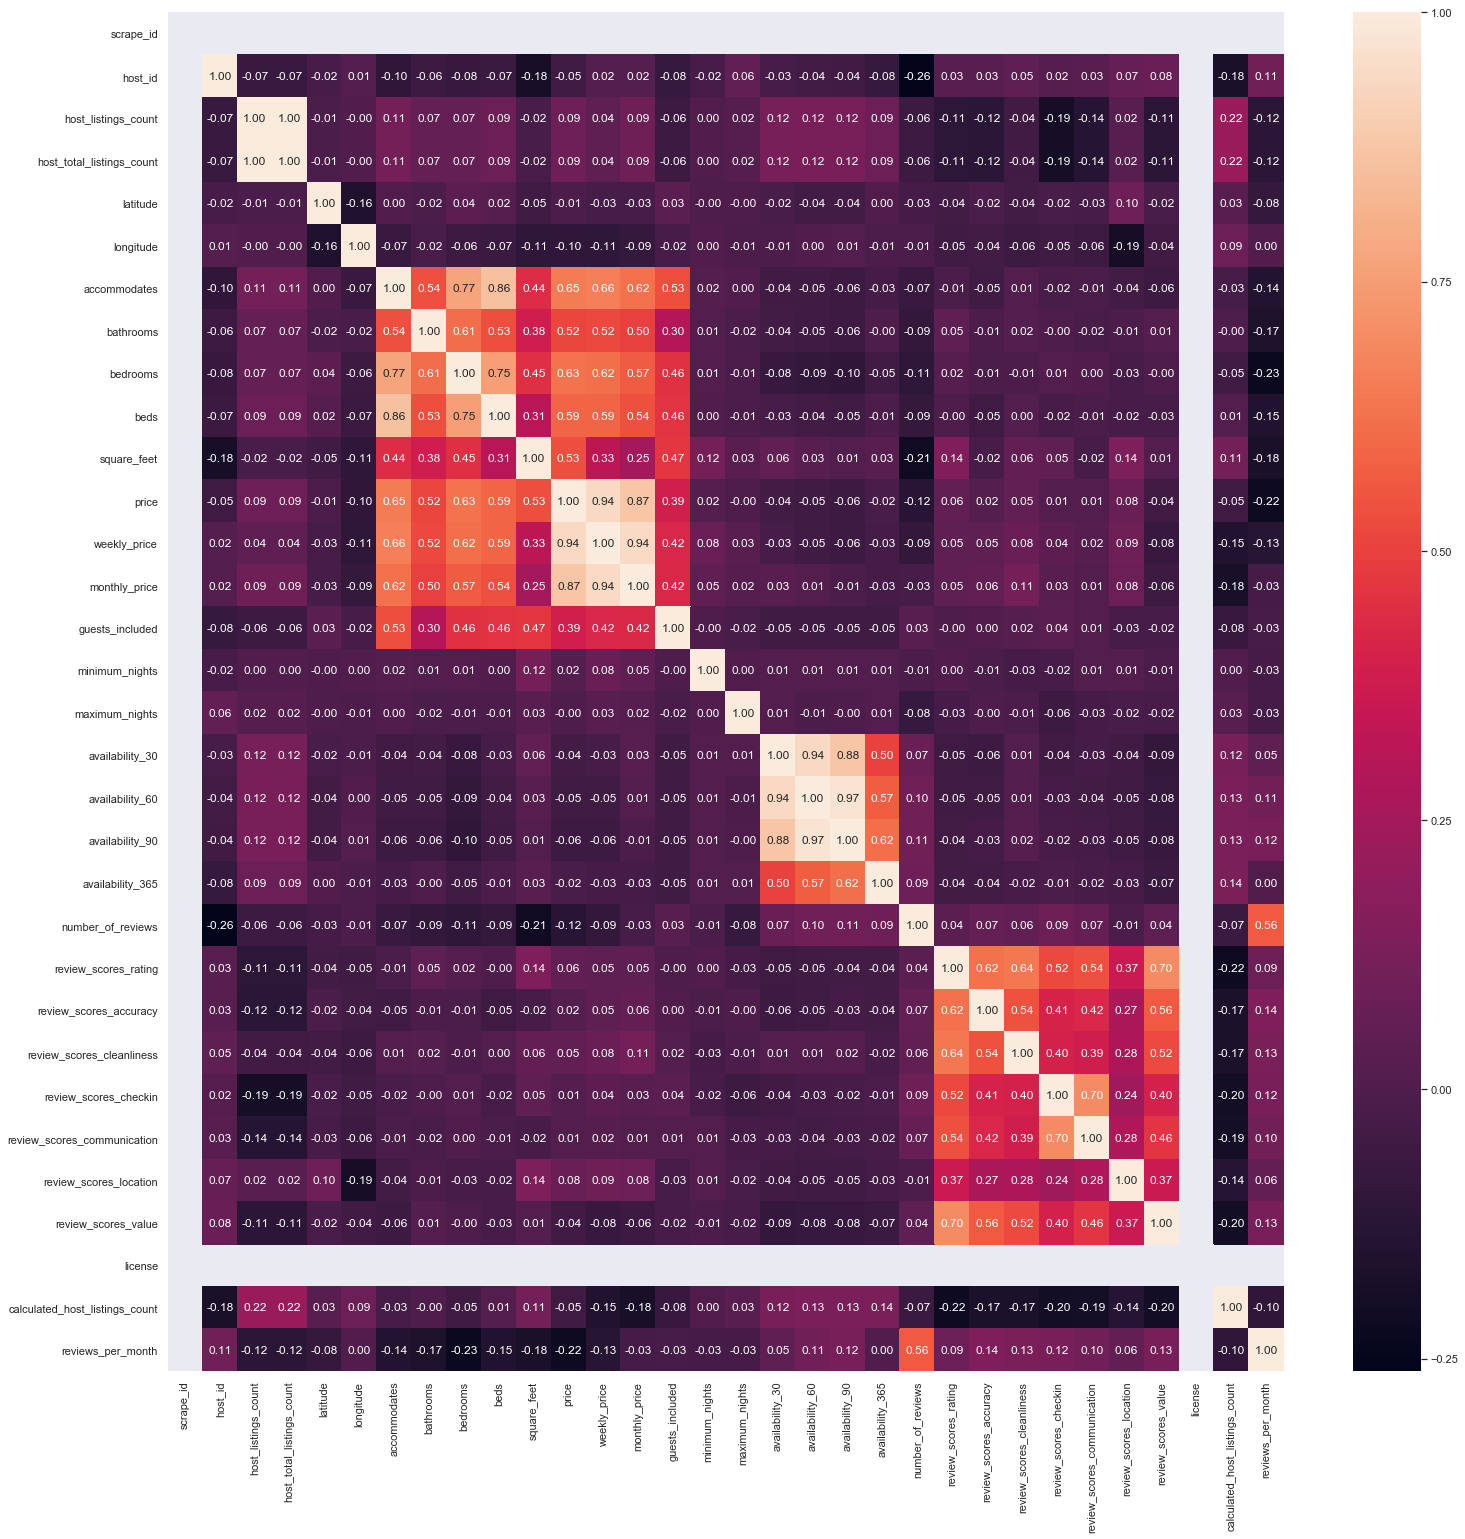

In [50]:
sns.set(rc={'figure.figsize':(25,25)})
sns.heatmap(df_s_list_new.corr(), annot=True, fmt=".2f");

In [51]:
#find NaN Boston for all. If more than 60% drop , if less than 60% impute
df_b_list_new.isnull().mean().sort_values(ascending=False) # missing values

neighbourhood_group_cleansed      1.000000
jurisdiction_names                1.000000
license                           1.000000
has_availability                  1.000000
square_feet                       0.984379
monthly_price                     0.752301
weekly_price                      0.751185
security_deposit                  0.625662
notes                             0.550907
interaction                       0.433473
access                            0.415342
neighborhood_overview             0.394700
host_about                        0.365132
transit                           0.359833
house_rules                       0.332497
cleaning_fee                      0.308787
space                             0.294840
review_scores_accuracy            0.229568
review_scores_location            0.229289
review_scores_value               0.229010
review_scores_checkin             0.228731
review_scores_cleanliness         0.228173
review_scores_communication       0.228173
review_scor

In [52]:
#find NaN Seattle for all. If more than 60% drop , if less than 60% impute
df_s_list_new.isnull().mean().sort_values(ascending=False) # missing values

license                             1.000000
square_feet                         0.974594
monthly_price                       0.602672
security_deposit                    0.511262
weekly_price                        0.473808
notes                               0.420639
neighborhood_overview               0.270299
cleaning_fee                        0.269775
transit                             0.244631
host_about                          0.224987
host_acceptance_rate                0.202462
review_scores_accuracy              0.172342
review_scores_checkin               0.172342
review_scores_value                 0.171818
review_scores_location              0.171556
review_scores_cleanliness           0.171032
review_scores_communication         0.170508
review_scores_rating                0.169460
last_review                         0.164222
first_review                        0.164222
reviews_per_month                   0.164222
space                               0.149031
host_respo

In [53]:
#Boston: Set of columns with more than 60% of NaN

top_miss_val_b = set(df_b_list_new.columns[df_b_list_new.isnull().mean() > 0.60])
top_miss_val_b

{'has_availability',
 'jurisdiction_names',
 'license',
 'monthly_price',
 'neighbourhood_group_cleansed',
 'security_deposit',
 'square_feet',
 'weekly_price'}

In [54]:
#Seattle: Set of columns with more than 60% of NaN

top_miss_val_s = set(df_s_list_new.columns[df_s_list_new.isnull().mean() > 0.60])
top_miss_val_s

{'license', 'monthly_price', 'square_feet'}

In [55]:
#Dropping the columns with more than 60% missing values for Boston
for col in top_miss_val_b:
    df_b_list_new = df_b_list_new.drop([col], axis=1)

In [56]:
#Dropping the columns with more than 60% missing values for Seattle
for col in top_miss_val_s:
    df_s_list_new = df_s_list_new.drop([col], axis=1)

In [57]:
#check if columns in 'top_miss_val_b' get dropped
top_miss_val_b = set(df_b_list_new.columns[df_b_list_new.isnull().mean() > 0.50])
top_miss_val_b

{'notes'}

In [58]:
#check if columns in 'top_miss_val_s' get dropped
top_miss_val_s = set(df_s_list_new.columns[df_s_list_new.isnull().mean() > 0.50])
top_miss_val_s

{'security_deposit'}

#### I will try to predict with only numerical values. If the results are not good I will use the categorical features. 

#### Before doing this need to get rid of NaN. 


In [82]:
#Numerical columns Boston  - I removed colums with 100% NaN from here and price
df_b_list_numerical_no_price = ['scrape_id', 'host_id', 'host_listings_count',
       'host_total_listings_count', 'latitude',
       'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'guests_included', 'minimum_nights', 'maximum_nights',
       'availability_30', 'availability_60',
       'availability_90', 'availability_365']

#Numerical columns Seattle - I removed colums with 100% NaN from here and price

df_s_list_numerical_no_price = ['scrape_id', 'host_id', 'host_listings_count',
       'host_total_listings_count', 'latitude', 'longitude', 'accommodates',
       'bathrooms', 'bedrooms', 'beds',
       'guests_included', 'minimum_nights', 'maximum_nights',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365']


In [83]:
#Boston - Missing Values - different output 

for column in df_b_list_new:
    if df_b_list_new[column].isnull().any():
       print('Column [{0}] has {1} null values'.format(column, df_b_list_new[column].isnull().sum()))

Column [summary] has 143 null values
Column [space] has 1057 null values
Column [neighborhood_overview] has 1415 null values
Column [notes] has 1975 null values
Column [transit] has 1290 null values
Column [access] has 1489 null values
Column [interaction] has 1554 null values
Column [house_rules] has 1192 null values
Column [thumbnail_url] has 599 null values
Column [medium_url] has 599 null values
Column [xl_picture_url] has 599 null values
Column [host_location] has 11 null values
Column [host_about] has 1309 null values
Column [host_response_time] has 471 null values
Column [host_response_rate] has 471 null values
Column [host_acceptance_rate] has 471 null values
Column [host_neighbourhood] has 339 null values
Column [neighbourhood] has 543 null values
Column [city] has 2 null values
Column [zipcode] has 38 null values
Column [market] has 14 null values
Column [property_type] has 3 null values
Column [bathrooms] has 14 null values
Column [bedrooms] has 10 null values
Column [beds] 

In [84]:
#Boston - Missing Values - different output 

for column in df_s_list_new:
    if df_s_list_new[column].isnull().any():
       print('Column [{0}] has {1} null values'.format(column, df_s_list_new[column].isnull().sum()))

Column [summary] has 177 null values
Column [space] has 569 null values
Column [neighborhood_overview] has 1032 null values
Column [notes] has 1606 null values
Column [transit] has 934 null values
Column [thumbnail_url] has 320 null values
Column [medium_url] has 320 null values
Column [xl_picture_url] has 320 null values
Column [host_name] has 2 null values
Column [host_since] has 2 null values
Column [host_location] has 8 null values
Column [host_about] has 859 null values
Column [host_response_time] has 523 null values
Column [host_response_rate] has 523 null values
Column [host_acceptance_rate] has 773 null values
Column [host_is_superhost] has 2 null values
Column [host_thumbnail_url] has 2 null values
Column [host_picture_url] has 2 null values
Column [host_neighbourhood] has 300 null values
Column [host_listings_count] has 2 null values
Column [host_total_listings_count] has 2 null values
Column [host_has_profile_pic] has 2 null values
Column [host_identity_verified] has 2 null 

In [85]:
#Only use numerical variables and drop any rows with missing values
#Use mean or median for imputing - I used mean , but tested with median also. I choose mean.

def model_func(df_model,num_list):
    X = df_model[num_list]
    X = X.groupby(X.columns, axis = 1).transform(lambda x: x.fillna(x.mean()))
    #X = X.groupby(X.columns, axis = 1).transform(lambda x: x.fillna(x.median()))
    y = df_model['price']


    #Split into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=40) 

    lm_model = LinearRegression(normalize=True) # Instantiate
    lm_model.fit(X_train, y_train) #Fit

    #Predict and score the model
    y_test_preds = lm_model.predict(X_test) 
    print("The r-squared score for your model was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test)))


In [86]:
#Prediction for Boston price
#Only numerical variables are used and droping any rows with missing values below

model_func(df_b_list_new,df_b_list_numerical_no_price)

The r-squared score for your model was 0.20406180348413427 on 1076 values.


In [87]:
#Prediction for Seattle price
#Only numerical variables are used and droping any rows with missing values below

model_func(df_s_list_new,df_s_list_numerical_no_price)

The r-squared score for your model was 0.3850953761419438 on 1146 values.


#### Categorical Variables

For better results we can include the categorical colums as they can provide a really good information.

In [88]:
#Boston Categorical columns
cat_df_b = df_b_list_new.select_dtypes(include=['object']) # Subset to a dataframe only holding the categorical columns
#cat_df_b
(np.sum(cat_df_b.isnull())/cat_df_b.shape[0]).sort_values(ascending = False)

notes                               0.550907
interaction                         0.433473
access                              0.415342
neighborhood_overview               0.394700
host_about                          0.365132
transit                             0.359833
house_rules                         0.332497
cleaning_fee                        0.308787
space                               0.294840
last_review                         0.210879
first_review                        0.210879
xl_picture_url                      0.167085
medium_url                          0.167085
thumbnail_url                       0.167085
neighbourhood                       0.151464
host_response_time                  0.131381
host_response_rate                  0.131381
host_acceptance_rate                0.131381
host_neighbourhood                  0.094561
summary                             0.039888
zipcode                             0.010600
market                              0.003905
host_locat

In [89]:
#for same categorical colums is ok to create dummmies but for others,
#in those dataset is challenging as we maight end up with more columns than rows

pd.get_dummies(df_b_list_new['cancellation_policy'])

,flexible,moderate,strict,super_strict_30
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,1,0,0,0
5,1,0,0,0
6,0,0,1,0
7,0,1,0,0
8,0,1,0,0
9,0,0,1,0


In [90]:
# pd.get_dummies(df_b_list['description'])
# pd.get_dummies(df_b_list['name'])
pd.get_dummies(df_b_list_new['neighbourhood'])


,Allston-Brighton,Back Bay,Beacon Hill,Brookline,Cambridge,Charlestown,Chestnut Hill,Chinatown,Dorchester,Downtown,...,Mission Hill,North End,Roslindale,Roxbury,Somerville,South Boston,South End,Theater District,West End,West Roxbury
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


#### I decided to add the categorical columns  'cancellation_policy' and 'neighbourhood' and rerun the model

In [91]:
df_b_list_dummies = pd.concat([df_b_list_new.drop('cancellation_policy', axis=1), pd.get_dummies(df_b_list_new['cancellation_policy'])], axis=1)
df_b_list_dummies = pd.concat([df_b_list_dummies.drop('neighbourhood', axis=1), pd.get_dummies(df_b_list_dummies['neighbourhood'])], axis=1)

In [92]:
df_b_list_dummies.shape

(3585, 118)

In [93]:
df_s_list_dummies = pd.concat([df_s_list_new.drop('cancellation_policy', axis=1), pd.get_dummies(df_s_list_new['cancellation_policy'])], axis=1)
df_s_list_dummies = pd.concat([df_s_list_dummies.drop('neighbourhood', axis=1), pd.get_dummies(df_s_list_dummies['neighbourhood'])], axis=1)

In [94]:
df_s_list_dummies.shape

(3818, 170)

In [95]:
print("Dataset:", [x for x in globals() if globals()[x] is df_b_list_dummies][0]) #Name of the dataset)
print("Numerical columns: ", df_b_list_dummies.select_dtypes(include=['uint8']).columns)
print('\n')

print("Dataset:", [x for x in globals() if globals()[x] is df_s_list_dummies][0]) #Name of the dataset)
print("Numerical columns: ", df_s_list_dummies.select_dtypes(include=['uint8']).columns)
print('\n')


Dataset: df_b_list_dummies
Numerical columns:  Index(['flexible', 'moderate', 'strict', 'super_strict_30', 'Allston-Brighton',
       'Back Bay', 'Beacon Hill', 'Brookline', 'Cambridge', 'Charlestown',
       'Chestnut Hill', 'Chinatown', 'Dorchester', 'Downtown',
       'Downtown Crossing', 'East Boston', 'Fenway/Kenmore',
       'Financial District', 'Government Center', 'Harvard Square',
       'Hyde Park', 'Jamaica Plain', 'Leather District', 'Mattapan',
       'Mission Hill', 'North End', 'Roslindale', 'Roxbury', 'Somerville',
       'South Boston', 'South End', 'Theater District', 'West End',
       'West Roxbury'],
      dtype='object')


Dataset: df_s_list_dummies
Numerical columns:  Index(['flexible', 'moderate', 'strict', 'Alki', 'Arbor Heights', 'Atlantic',
       'Ballard', 'Belltown', 'Bitter Lake', 'Brighton', 'Broadview',
       'Broadway', 'Bryant', 'Capitol Hill', 'Cedar Park',
       'Central Business District', 'Columbia City', 'Crown Hill', 'Dunlap',
       'Eastlak

In [96]:
#Adding the the new categorical values I did with dummies

#Numerical columns Boston  - I removed colums with 100% NaN from here and price
df_b_list_numerical_no_price = ['scrape_id', 'host_id', 'host_listings_count',
       'host_total_listings_count', 'latitude',
       'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'guests_included', 'minimum_nights', 'maximum_nights',
       'availability_30', 'availability_60',
       'availability_90', 'availability_365','flexible', 'moderate', 'strict', 'super_strict_30', 'Allston-Brighton',
       'Back Bay', 'Beacon Hill', 'Brookline', 'Cambridge', 'Charlestown',
       'Chestnut Hill', 'Chinatown', 'Dorchester', 'Downtown',
       'Downtown Crossing', 'East Boston', 'Fenway/Kenmore',
       'Financial District', 'Government Center', 'Harvard Square',
       'Hyde Park', 'Jamaica Plain', 'Leather District', 'Mattapan',
       'Mission Hill', 'North End', 'Roslindale', 'Roxbury', 'Somerville',
       'South Boston', 'South End', 'Theater District', 'West End',
       'West Roxbury']

#Numerical columns Seattle - I removed colums with 100% NaN from here and price

df_s_list_numerical_no_price = ['scrape_id', 'host_id', 'host_listings_count',
       'host_total_listings_count', 'latitude', 'longitude', 'accommodates',
       'bathrooms', 'bedrooms', 'beds',
       'guests_included', 'minimum_nights', 'maximum_nights',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365','flexible', 'moderate', 'strict', 'Alki', 'Arbor Heights', 'Atlantic',
       'Ballard', 'Belltown', 'Bitter Lake', 'Brighton', 'Broadview',
       'Broadway', 'Bryant', 'Capitol Hill', 'Cedar Park',
       'Central Business District', 'Columbia City', 'Crown Hill', 'Dunlap',
       'Eastlake', 'Fairmount Park', 'Fauntleroy', 'First Hill', 'Fremont',
       'Gatewood', 'Genesee', 'Georgetown', 'Green Lake', 'Greenwood',
       'Haller Lake', 'Harrison/Denny-Blaine', 'High Point', 'Highland Park',
       'Holly Park', 'Industrial District', 'Interbay',
       'International District', 'Laurelhurst', 'Leschi', 'Licton Springs',
       'Lower Queen Anne', 'Madison Park', 'Madrona', 'Magnolia', 'Maple Leaf',
       'Mathews Beach', 'Meadowbrook', 'Minor', 'Montlake', 'Mount Baker',
       'North Admiral', 'North Beach/Blue Ridge', 'North Beacon Hill',
       'North College Park', 'North Delridge', 'Olympic Hills',
       'Phinney Ridge', 'Pike Market', 'Pike Place Market', 'Pinehurst',
       'Pioneer Square', 'Portage Bay', 'Queen Anne', 'Rainier Beach',
       'Ravenna', 'Riverview', 'Roosevelt', 'Roxhill', 'Seaview',
       'Seward Park', 'South Beacon Hill', 'South Delridge',
       'South Lake Union', 'South Park', 'Stevens', 'The Junction',
       'University District', 'Victory Heights', 'View Ridge', 'Wallingford',
       'Wedgewood', 'Westlake', 'Windermere', 'Yesler Terrace']


In [97]:
model_func(df_b_list_dummies,df_b_list_numerical_no_price)

The r-squared score for your model was 0.2601979502131452 on 1076 values.


**The r-squared score was 0.20406180348413427 on 1076 values with only numerical**  

In [98]:
model_func(df_s_list_dummies,df_s_list_numerical_no_price)

The r-squared score for your model was -1.407237543765449e+25 on 1146 values.


**The r-squared score was 0.3828414718721894 on 1146 values with only numerical. Looks like overfit**  

In [99]:
#Numerical columns Seattle - I removed 'neighbourhood' and left 'cancellation_policy' and got better results

df_s_list_numerical_no_price = ['scrape_id', 'host_id', 'host_listings_count',
       'host_total_listings_count', 'latitude', 'longitude', 'accommodates',
       'bathrooms', 'bedrooms', 'beds',
       'guests_included', 'minimum_nights', 'maximum_nights',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365','flexible', 'moderate', 'strict']


In [100]:
model_func(df_s_list_dummies,df_s_list_numerical_no_price)

The r-squared score for your model was 0.4209335925028127 on 1146 values.


### Conclusion

Using CRISP-DM Process I was able to answer and visualize different questions and during this analysis you can come with many more questions and answers very easily . Missing values and the categorical columns introduce complications. I decided to drop columns with more than 60% of missing values (as they are only few) and Impute the rest columns with the mean (I did try also with Median and get same results). For imputing I used pandas. Also tried to use the categorical values to improve my prediction. I used 2 categorical columns only and got better results for Boston. For Seattle I did not get good results and had to use only one of the categorical columns I have chosen . This is something I think have to be tested with multiple variations as can lead to good results and also to Biased models. I would say the best will be to use functions so that different combinations can be easily utilized.

**Question1:** Where is more expensive - Boston is more expensive than Seattle for a vacation (you will pay more for the rent) 

**Question2:** What are the busiest days and what time is best to go - more rental options (weekends are more busy than the weekdays as this is expected I think). There are no significant peaks in Seattle. It can be hard to find rental during Boston marathon weekend and especially September when students are back to school. The missing values might affect our analysis especially if they  are related to a specific group or price range but I do not think this is the case in the datasets we I am using.

**Question3:** Create model for rental price prediction - I creagted a prediction model using listings.csv dasatest for Boston and Seattle. I used mainly the numerical columns as they provided a good information and tested with few categorical also wich improves the prediction results a lot.